<a href="https://colab.research.google.com/github/Puru-Gupta/IMDB_Sentiment_Analysis_Bidirectional_LSTM/blob/main/IMDB_Sentiment_Analysis_Kaggle_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IMDB dataset** 
**Having 50K movie reviews for natural language processing or Text analytics.**
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. *We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms*.
For more dataset information, please go through the following link,
More_detail: [http://ai.stanford.edu/~amaas/data/sentiment/]

##**We'll be building the following:**<br>
**Model 1: Naive Bayes (baseline Model)**<br>
**Model 2: Feed-forward neural network (dense model)**<br>
**Model 3: LSTM model**<br>
**Model 3: GRU model**<br>
**Model 4: TensorFlow Hub Pretrained Feature Extractor** 

In [2]:
#Fro Importing data from kaggle 
#Install the Kaggle first 
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purushottamgupta","key":"dbaa764b15959296b10e816f5c6905ce"}'}

In [6]:
#Now we rae going to craete kaggle directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
# Now se will copy the json file to folder that we have created
! cp kaggle.json ~/.kaggle/

In [8]:
#Now we need permision to get json file act
! chmod 600 ~/.kaggle4/kaggle.json


chmod: cannot access '/root/.kaggle4/kaggle.json': No such file or directory


In [9]:
##Kaggle API Command for getting Data directly from Kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 66% 17.0M/25.7M [00:00<00:00, 70.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.7MB/s]


In [10]:
import zipfile
! unzip /content/imdb-dataset-of-50k-movie-reviews.zip


Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [11]:
import pandas as pd
import numpy as np

In [12]:
data_reviews = pd.read_csv("/content/IMDB Dataset.csv")
data_reviews.shape
data_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [13]:
import random
data_list = data_reviews["review"]
sample_data = random.choices(data_list, k=1)
print(sample_data)

['One hour, eight minutes and twelve seconds into this flick and I decided it was pretty lame. That was right after Hopalong (Chris Lybbert) drops on his horse from a tree to rejoin the good guy posse. I was pretty mystified by the whole Hopalong Cassidy/Great Bar 20 gimmick which didn\'t translate into anything at all. Obviously, the name Coppola in the credits couldn\'t do anything to guarantee success here, even with more than one listed.<br /><br />If you make it to the end of the film, you\'ll probably wind up asking yourself the same questions I did. What exactly was the hook with the gloves? What\'s up with the rodeo scenario? Who was The Stranger supposed to represent? Why did they make this film? <br /><br />I could probably go on but my energy\'s been drained. Look, there\'s already a Western called "The Gunfighter" from 1950 with a guy named Gregory Peck as the title character. Watching it will make you feel as good as watching this one makes you feel bad. That one I can rec

In [12]:
data_reviews.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [14]:
#Suffle data
suffle_reviews = data_reviews.sample(frac = 1, random_state=42)
suffle_reviews.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [15]:
import random
random_index = random.randint(0, len(data_reviews)-5)
for row in suffle_reviews[["review", "sentiment"]][random_index:random_index+1].itertuples():
  _, review, sentiment = row
  print(suffle_reviews['sentiment'])
  print("\n")
  print(suffle_reviews['review'])
  print("---\n")

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
from sklearn.preprocessing import LabelEncoder
suffle_reviews["sentiment"] = LabelEncoder().fit_transform(suffle_reviews["sentiment"])

In [18]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(suffle_reviews["review"].to_numpy(),
                                                                            suffle_reviews["sentiment"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [19]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(45000, 45000, 5000, 5000)

In [20]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['Prot (Kevin Spacey) is a mental hospital patient who claims to be native to a distant planet called K-PAX. His psychiatrist, Dr. Mark Powell (Jeff Bridges) tries to help him, all the while trying to understand Prot and find out if he is really from K-PAX.<br /><br />This movie doesn\'t really fall into any particular genre. One big part of K-PAX is drama/ science-fiction, another part fantasy, plus, add to that a dash of comedy and you begin to get what K-PAX is all about. The story (as you see above) isn\'t too complicated or deep, but it still offers some good twists and turns of the plot that may still surprise you as they did me. No special effects or graphics accompany this movie, and there\'s no need to have them, the music in the film is great however. A techno soundtrack along with a terrific piano piece makes K-PAX sound sci-fi and makes certain scenes intriguing.<br /><br />Kevin Spacey is the heart of the movie and plays a very convincing alien (Prot) from the plane

In [90]:
train_sentences

"A surprisingly good documentary. My surprise was mainly due to the fact that I was confused by the title. I assumed this was about the influence of the drug culture on film making but no it is a much more far reaching and intelligent film than could have been expected. Demme has done a great job in encapsulating the period from the late 60s to the late 70s. From, 'Easy Rider' and the collapse of studio influence, through all those introspective 'real life' movies, where brilliant young directors tried to express themselves politically, sexually and artistically, through to the beginnings of the blockbuster and the return of the reigns to the money men and their studios. As someone who saw the 'real life' movies of Britain and the rest of Europe through the sixties and then the revolutionary US films of the 70s and is sad that the sequel to the sequel is so much the order of the day, this was a most fascinating film. The interview clips are measured (thanks to DVD the full interviews a

In [21]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

231

In [22]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [23]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 231 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace', ngrams=None, 
                                    output_mode='int',
                                    pad_to_max_tokens=False,
                                    output_sequence_length=max_length)
            

In [24]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [25]:
#Example creating sample sequence and tokenize
sample_sen= " i love tesnorflow and its libraries"
text_vectorizer(sample_sen)

<tf.Tensor: shape=(231,), dtype=int64, numpy=
array([ 10, 111,   1,   4,  30,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  

In [26]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
I first saw "Breaking Glass" when it was released in England in 1980..I loved it then and having just caught it in August 2005 on a Canadian station it still is great. The only thing I regret is I can't find the sound track or the DVD in the stores??...anyone care to shed some light or must I order it from some over priced internet company. But getting back to the film the music stands up to the test of time, Hazel/Kate had something to say about 80's Britain..actually it was the same decade I moved to Canada for some of the same reasons one being "Thatcher" and what she was doing to the country at the time. Please if you get the chance watch this movie you won't be sorry!      

Vectorized version:


<tf.Tensor: shape=(1, 231), dtype=int64, numpy=
array([[  10,   88,  204, 2453, 3009,   51,    9,   14,  626,    8, 1932,
           8,    1,  427,    9,   91,    4,  255,   41, 1003,    9,    8,
        6778, 3319,   21,    3, 2304, 1617,    9,  126,    7,   82,    2,
          61,  148,   10, 2497,    7,   10,  172,  159,    2,  446, 1341,
          40,    2,  269,    8,    2,    1,  458,    6, 3265,   47,  709,
          40,  211,   10,  636,    9,   36,   47,  128,    1, 2899, 1084,
          19,  374,  144,    6,    2,   20,    2,  208, 1334,   57,    6,
           2, 2268,    5,   60,    1,   68,  138,    6,  129,   43,  810,
           1,    9,   14,    2,  165, 2174,   10, 1613,    6, 3901,   17,
          47,    5,    2,  165, 1011,   29,  107,    1,    4,   49,   59,
          14,  390,    6,    2,  690,   31,    2,   60,  597,   44,   23,
          76,    2,  575,  104,   11,   18,   23,  457,   27,  747,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [23]:
count = []
for x in range(len(suffle_reviews)):
  lenght_words = len(suffle_reviews['review'][x])
  count.append(lenght_words)


(array([1.63838502e-05, 2.35517847e-04, 3.45231129e-04, 3.26799298e-04,
        1.06787595e-03, 1.02911059e-03, 7.29812756e-04, 5.57050907e-04,
        4.46021065e-04, 3.49034523e-04, 2.77208894e-04, 2.48683441e-04,
        2.06553540e-04, 1.83001755e-04, 1.55646577e-04, 1.30046811e-04,
        1.20977180e-04, 1.04300761e-04, 8.60152136e-05, 7.40198947e-05,
        6.74370977e-05, 6.30485664e-05, 5.51492101e-05, 4.75424225e-05,
        4.50555881e-05, 3.83265067e-05, 3.11585723e-05, 3.02808660e-05,
        2.51609128e-05, 2.41369222e-05, 2.50146284e-05, 1.88706846e-05,
        1.65301346e-05, 1.60912815e-05, 1.43358689e-05, 1.41895846e-05,
        1.12638970e-05, 1.25804564e-05, 1.08250439e-05, 1.14101814e-05,
        1.18490345e-05, 1.15564658e-05, 9.36220012e-06, 5.70509070e-06,
        1.90169690e-06, 1.46284377e-06, 4.38853130e-07, 2.92568754e-07,
        1.46284377e-07, 1.46284377e-07, 1.46284377e-07, 5.85137507e-07,
        4.38853130e-07, 1.46284377e-07, 0.00000000e+00, 0.000000

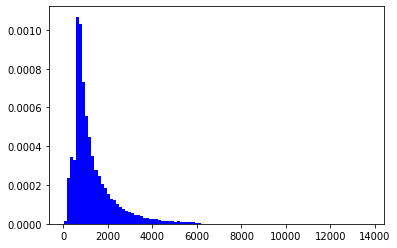

In [34]:
import matplotlib.pyplot as plt
plt.hist(count, bins = 100,
         density=True, 
         histtype='bar', 
         color='b', label=None,)

10405973

In [29]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [30]:
 #Getting a baseline Naive Bayes (baseline)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_base = Pipeline([
                       ('tfidf', TfidfVectorizer()),
                       ("clf", MultinomialNB())
                        
])

# Fit the pipeline to the training data
model_base.fit(train_sentences, train_labels)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [31]:
baseline_score = model_base.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 86.32%


In [32]:
baseline_pred = model_base.predict(val_sentences)

In [ ]:
 #Evaluation function for our model experiments

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def model_accuracy_metrics(label_true, label_preds):
  model_accuracy = accuracy_score(label_true,label_preds)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(label_true, label_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results                  

In [79]:
model_1_results = model_accuracy_metrics(val_labels,
                                    baseline_pred) 
model_1_results

{'accuracy': 0.8632,
 'f1': 0.8631392707522382,
 'precision': 0.8636896682740364,
 'recall': 0.8632}

In [ ]:
#Model number 2
#LSTM_RNN

In [42]:
tf.random.set_seed(42)
model2_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

#Now LSTM model
inputs = tf.keras.layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model2_embedding(x)
x = tf.keras.layers.LSTM(128)(x)
#x = tf.keras.layers.LSTM(64)(x)
x= tf.keras.layers.Dense(64, activation='relu')(x)
x= tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, output, name="model_2_LSTM")

#Model compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#lr_schedular = tf.keras.callbacks.LearningRateScheduler((lambda epoch: 1e-3 * 10**(epoch/20))

history_1 = model_2.fit(train_sentences, 
                        train_labels, 
                        epochs=3, 
                        batch_size=256,
                        validation_data = (val_sentences, val_labels))



Epoch 1/3
176/176 [==============================] - 19s 93ms/step - loss: 0.6790 - accuracy: 0.5565 - val_loss: 0.6659 - val_accuracy: 0.5996
Epoch 2/3
176/176 [==============================] - 16s 88ms/step - loss: 0.6691 - accuracy: 0.5758 - val_loss: 0.6695 - val_accuracy: 0.5624
Epoch 3/3
176/176 [==============================] - 16s 89ms/step - loss: 0.5844 - accuracy: 0.7042 - val_loss: 0.5988 - val_accuracy: 0.6588


In [43]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 231)              0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 231, 128)          1280000   
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                      

In [44]:

# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)

In [45]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [48]:
# Calculate LSTM model results
model_2_results = model_accuracy_metrics(val_labels,
                                    model_2_preds) 
model_2_results

{'accuracy': 0.6588,
 'f1': 0.6273310980724969,
 'precision': 0.7427695608484184,
 'recall': 0.6588}

In [76]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64, return_sequences=True)(x) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels)
                             )               

Epoch 1/5
1407/1407 [==============================] - 141s 97ms/step - loss: 0.6531 - accuracy: 0.5628 - val_loss: 0.3762 - val_accuracy: 0.8338
Epoch 2/5
1407/1407 [==============================] - 136s 97ms/step - loss: 0.2921 - accuracy: 0.8771 - val_loss: 0.2646 - val_accuracy: 0.8892
Epoch 3/5
1407/1407 [==============================] - 136s 97ms/step - loss: 0.1970 - accuracy: 0.9231 - val_loss: 0.2686 - val_accuracy: 0.8920
Epoch 4/5
1407/1407 [==============================] - 136s 97ms/step - loss: 0.1357 - accuracy: 0.9514 - val_loss: 0.3201 - val_accuracy: 0.8876
Epoch 5/5
1407/1407 [==============================] - 136s 97ms/step - loss: 0.0840 - accuracy: 0.9729 - val_loss: 0.3919 - val_accuracy: 0.8776


In [53]:
#Make predictions on the validation dataset
model_3_pred_probs = model_3.predict(val_sentences)

In [54]:
#Round out predictions and reduce to 1-dimensional array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [55]:
# Calculate LSTM model results
model_3_results = model_accuracy_metrics(val_labels,
                                    model_3_preds)
model_3_results

{'accuracy': 0.8838,
 'f1': 0.8837996235010214,
 'precision': 0.883799883355801,
 'recall': 0.8838}

In [ ]:
#TensorFlow Hub Pretrained Sentence Encoder

In [56]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder

In [59]:
# Each sentence has been encoded into a 512 dimension vector
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [88]:
# Create model using the Sequential API
model_4 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_4_USE")

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 
# Train a classifier on top of pretrained embeddings
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              )               



Epoch 1/5
1407/1407 [==============================] - 92s 65ms/step - loss: 0.3537 - accuracy: 0.8479 - val_loss: 0.3158 - val_accuracy: 0.8638
Epoch 2/5
1407/1407 [==============================] - 86s 61ms/step - loss: 0.3219 - accuracy: 0.8607 - val_loss: 0.3139 - val_accuracy: 0.8658
Epoch 3/5
1407/1407 [==============================] - 87s 62ms/step - loss: 0.3176 - accuracy: 0.8625 - val_loss: 0.3117 - val_accuracy: 0.8648
Epoch 4/5
1407/1407 [==============================] - 87s 62ms/step - loss: 0.3117 - accuracy: 0.8639 - val_loss: 0.3108 - val_accuracy: 0.8640
Epoch 5/5
1407/1407 [==============================] - 87s 62ms/step - loss: 0.3057 - accuracy: 0.8677 - val_loss: 0.3094 - val_accuracy: 0.8652


In [62]:
model_4.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_17 (Dense)            (None, 64)                32832     
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [89]:
#Make predictions on the validation dataset
model_4_pred_probs = model_4.predict(val_sentences)

In [90]:
#Round out predictions and reduce to 1-dimensional array
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [91]:
# Calculate LSTM model results
model_4_results = model_accuracy_metrics(val_labels,
                                    model_4_preds)
model_4_results

{'accuracy': 0.8652,
 'f1': 0.8650825832103622,
 'precision': 0.8667426762850154,
 'recall': 0.8652}

In [92]:

# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "Transfer_Learning": model_4_results
                                  })
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.8632,0.863690,0.8632,0.863139
lstm,0.6588,0.742770,0.6588,0.627331
gru,0.8838,0.883800,0.8838,0.883800
Transfer_Learning,0.8652,0.866743,0.8652,0.865083
